In [1]:
# Import the necessary libraries
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt




In [14]:
# # Download the necessary NLTK data
# nltk.download('punkt')
# nltk.download('stopwords')

In [3]:
data = pd.read_csv('./DataSet/text_emotion.csv')      

print(data.shape)

#removing unwanted instances in dataset
data.drop(data.index[(data["Emotion"] == "guit")],axis=0,inplace=True)  

(7516, 2)


In [12]:
data.head()

,Emotion,Text
0,joy,days feel close partner friends feel peace als...
1,fear,every time imagine someone love could contact ...
2,anger,obviously unjustly treated possibility elucida...
3,sadness,think short time live relate periods life thin...
4,disgust,gathering found involuntarily sitting next two...


In [4]:
# Define a function to preprocess and tokenize the text
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text


In [5]:
# Apply the preprocessing function to the text column of the dataframe
data['Text'] = data['Text'].apply(preprocess_text)

# Create a vectorizer to convert text to features
vectorizer = TfidfVectorizer()

# Extract features from the text
X = vectorizer.fit_transform(data['Text'])

X_train, X_test, y_train, y_test = train_test_split(X, data['Emotion'], test_size=0.2, random_state=42)

In [6]:
# Create a support vector machine (SVM) classifier and train it on the training data
svm_clf = LinearSVC()
svm_clf.fit(X_train, y_train)

# Create a logistic regression classifier and train it on the training data
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

LogisticRegression()

In [7]:

# Predict the emotion of new text using the SVM model
new_text = 'the product is very bad'
new_text_preprocessed = preprocess_text(new_text)
new_text_features = vectorizer.transform([new_text_preprocessed])
svm_prediction = svm_clf.predict(new_text_features)[0]
print('The predicted emotion using SVM is:', svm_prediction)

The predicted emotion using SVM is: disgust


In [8]:
# Predict the emotion of new text using the logistic regression model
lr_prediction = lr_clf.predict(new_text_features)[0]
print('The predicted emotion using logistic regression is:', lr_prediction)

The predicted emotion using logistic regression is: disgust


In [9]:
# Evaluate the accuracy of the models on the test data
svm_y_pred = svm_clf.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print('The accuracy of the SVM model is:', svm_accuracy)

lr_y_pred = lr_clf.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print('The accuracy of the logistic regression model is:', lr_accuracy)

The accuracy of the SVM model is: 0.5535595475715236
The accuracy of the logistic regression model is: 0.5575515635395875


<BarContainer object of 7515 artists>

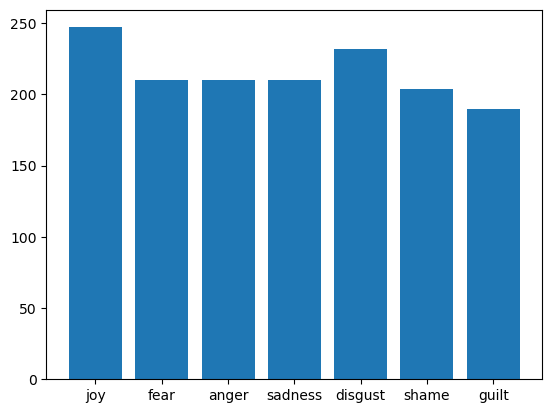

In [10]:
# Create a bar chart to visualize the predicted emotions
emotions = data["Emotion"]
svm_counts = [list(svm_y_pred).count(e) for e in emotions]
lr_counts = [list(lr_y_pred).count(e) for e in emotions]
fig, ax = plt.subplots()
ax.bar(emotions, svm_counts, label='SVM')